In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from graphviz import Digraph


from IPython.display import display

In [198]:
# Check versions for SMOTE 
'''
import scipy 
print(scipy.__version__)
import sklearn
print(sklearn.__version__)
import imblearn
print(imblearn.__version__)
'''

1.6.2
0.24.1
0.8.0


In [17]:
def load_diabetes_data(path):
    # load in the original data
    diabetes_orig = pd.read_csv(path)
    
    # Get the number of features (columns)
    #num_features = diabetes_orig.shape[1] - 2 #-2 for the ID columns
    #print(f"Number of features in the dataset: {num_features}")
    
    # take just one person from each household
    diabetes = diabetes_orig.groupby("HHX") \
      .sample(1, random_state=24648765) \
      .reset_index() \
      .copy()
    # add an id column
    diabetes["id"] = np.arange(len(diabetes.index))
    # create the house_family_person_id column by joining together three ID columns
    diabetes["house_family_person_id"] = diabetes.apply(lambda x: "_".join(x[["HHX", "FMX", "FPX"]].astype(int).astype(str)), 
                                                        axis=1)
    # create the diabetes column
    diabetes["diabetes"] = (diabetes["DIBEV1"] == 1).astype(int)
    # create coronary heart disease column
    diabetes["coronary_heart_disease"] = (diabetes["CHDEV"] == 1).astype(int)
    # create hypertension column
    diabetes["hypertension"] = (diabetes["HYPEV"] == 1).astype(int)
    # create heart_condition column
    diabetes["heart_condition"] = (diabetes["HRTEV"] == 1).astype(int)
    # create cancer column
    diabetes["cancer"] = (diabetes["CANEV"] == 1).astype(int)
    # create family_history_diabetes column
    diabetes["family_history_diabetes"] = (diabetes["DIBREL"] == 1).astype(int)
    # rename remaining relevant columns
    diabetes = diabetes.rename(columns={"AGE_P": "age",
                                      "SMKEV": "smoker",
                                      "SEX": "sex",
                                      "AWEIGHTP": "weight",
                                      "BMI": "bmi",
                                      "AHEIGHT": "height"})

    # select just the relevant columns
    diabetes = diabetes[["house_family_person_id",
                        "diabetes",
                        "age",
                        "smoker",
                        "sex",
                        "coronary_heart_disease",
                        "weight",
                        "bmi",
                        "height",
                        "hypertension",
                        "heart_condition",
                        "cancer",
                        "family_history_diabetes"]]
    return(diabetes)

In [18]:
path = '/Users/deberend/Desktop/Cornell Tech/Topics in Data Science and OR/Midterm Project/berend-66-TDSOR_midterm_project_ABE/data/samadult.csv'
df = load_diabetes_data(path)

In [122]:
display(df)

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
0,1_2_1,0,24,2,2,0,125,2019,66,0,0,0,0
1,2_1_1,0,76,2,1,0,190,2727,70,1,0,0,0
2,3_1_2,0,36,2,2,0,225,3862,64,0,0,0,1
3,5_1_1,0,35,1,2,0,240,3995,65,0,0,0,1
4,10_1_5,0,20,2,2,0,103,1883,62,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32494,71559_1_1,0,56,1,1,0,172,2399,71,0,0,1,1
32495,71565_1_1,0,58,1,1,0,225,3141,71,1,0,0,1
32496,71569_1_1,1,71,1,2,1,124,2501,59,1,0,0,1
32497,71576_1_1,0,64,1,1,0,188,2945,67,1,0,0,0


In [8]:
# Create csv file of new df 
#df.to_csv('diabetes.csv', index=False)

In [14]:
# Checking for basic statistics and data information to understand the data better
data_info = df.info()
data_description = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()


# Displaying the outputs
display(data_info)

print('Summary statistics table of the dataset:')
display(data_description)

print('Number of missing entries per feature:')
display(missing_values)

# Getting latex tables for report
download_tables = False
if download_tables:
    
    # Summary statistics table
    latex_table_summary = data_description.to_latex(index=True, caption="Summary statistics table of the dataset", label="tab:summary_statistics", float_format="%.2f")
    print(latex_table_summary)
    with open("summary_statistics_table.tex", "w") as file:
        file.write(latex_table_summary)
    
    # Missing values table
    latex_missing_values = missing_values.to_latex(index=True, header=["Missing Entries"], caption="Number of Missing Entries per Feature", label="tab:missing_entries")
    print(latex_missing_values)

    # Optionally save to a file
    with open("missing_entries_table.tex", "w") as file:
        file.write(latex_missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32499 entries, 0 to 32498
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   house_family_person_id   32499 non-null  object
 1   diabetes                 32499 non-null  int64 
 2   age                      32499 non-null  int64 
 3   smoker                   32499 non-null  int64 
 4   sex                      32499 non-null  int64 
 5   coronary_heart_disease   32499 non-null  int64 
 6   weight                   32499 non-null  int64 
 7   bmi                      32499 non-null  int64 
 8   height                   32499 non-null  int64 
 9   hypertension             32499 non-null  int64 
 10  heart_condition          32499 non-null  int64 
 11  cancer                   32499 non-null  int64 
 12  family_history_diabetes  32499 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 3.2+ MB


None

Summary statistics table of the dataset:


,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
count,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000
mean,0.107142,51.051017,1.608942,1.547494,0.055232,251.113850,3045.910736,68.817748,0.356042,0.089603,0.112865,0.354134
std,0.309298,18.511120,0.609761,0.497747,0.228437,240.280025,1451.552127,8.459210,0.478835,0.285616,0.316433,0.478257
min,0.000000,18.000000,1.000000,1.000000,0.000000,100.000000,1167.000000,59.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.000000,1.000000,1.000000,0.000000,150.000000,2374.000000,64.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,52.000000,2.000000,2.000000,0.000000,176.000000,2724.000000,67.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,66.000000,2.000000,2.000000,0.000000,214.000000,3173.000000,70.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,85.000000,9.000000,2.000000,1.000000,999.000000,9999.000000,99.000000,1.000000,1.000000,1.000000,1.000000


Number of missing entries per feature:


house_family_person_id     0
diabetes                   0
age                        0
smoker                     0
sex                        0
coronary_heart_disease     0
weight                     0
bmi                        0
height                     0
hypertension               0
heart_condition            0
cancer                     0
family_history_diabetes    0
dtype: int64

In [15]:
# Check random rows 
display(df.sample(5))

# Check the anomily smoker counts
print('Smoker value counts:')
display(df['smoker'].value_counts())

# Get latex table
if False:
    smoker_counts = df['smoker'].value_counts()

    # Convert to LaTeX
    latex_smoker_counts = smoker_counts.to_latex(index=True, header=["Counts"], caption="Smoker Value Counts", label="tab:smoker_counts")
    print(latex_smoker_counts)

    # Optionally save to a file
    with open("smoker_counts_table.tex", "w") as file:
        file.write(latex_smoker_counts)

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes
2848,6279_1_1,0,41,2,2,0,125,1957,67,0,0,1,0
17685,38674_1_1,0,43,1,2,0,170,3213,61,0,0,0,1
3,5_1_1,0,35,1,2,0,240,3995,65,0,0,0,1
22063,48253_1_1,0,52,1,2,0,997,9999,64,1,0,0,1
18290,39989_1_1,1,68,2,2,0,115,2248,60,0,0,1,1


Smoker value counts:


2    19071
1    13325
8       59
7       23
9       21
Name: smoker, dtype: int64

## Initial thoughts:
#### Data Structure:
- No missing values in any of the columns.
- The dataset includes 12 numerical columns and 1 object column (house_family_person_id). 

#### Statistical Summary:

**Diabetes**: 10.7% of the individuals have diabetes.

**Age**: The age range is from 18 to 85, with an average of 51 years.

**Smoker**: The majority are non-smokers, but there are some anomalies with values exceeding 2, which might indicate errors.

**Sex**: There seems to be a roughly even split between male (1) and female (2) participants.

**Weight**: Ranges from 100 to 999 pounds, with an average around 251 pounds. 
   - Extreme values (e.g., 999) suggest unreasonable outluers.

**BMI**: Varies from 1167 to 9999 (it appears the BMI has been scaled by a factor of 1000), with a mean of 3045 (or a BMI of 30.45 when scaled back). 
   - Again, unreasonable outlier values here 

**Height**: Ranges from 59 to 99 inches.
   - 99 inch could be possible but very unlikely, so adjust for that
    

Other health indicators:
- 35.6% have hypertension.
- 8.9% have heart conditions.
- 11.3% have cancer.
- 35.4% have a family history of diabetes.

**Potential Anomalies**:
- The smoker column has values above 2, which may represent errors. **Values > 2 will be removed.** 'with 7, 8, and 9 for refusals, missing data, or uncertainty​'

### Potential subsequent action items:
- make house_family_person_id numeric
- fix scale on BMI (divide by 100)
- fix inconsistent values in the smoker column
- standardize or normalize? (might not be necessary)
- OHE for the categorical variables; smoker and sex, and maybe for BMI and age (by using age bins)
- weight and bmi outliers: Values of 999 for weight and BMI, or extremely high values (e.g., 9999 BMI), suggest outliers or potential errors. You should review these values and decide whether to correct or remove them. This could be done via:
    - Outlier detection (e.g., based on interquartile ranges).
    - Reassessing if these entries represent real-world data (e.g., by calculating BMI from weight and height).
    - other ways?
- **Diabetes Imbalance**: Only about 10.7% of the individuals have diabetes. If you plan to build models for prediction, you may want to address this imbalance using:
    - Oversampling (e.g., SMOTE) or Undersampling.
   
   
   
Feature engineering:
- **Age Binning**: Since age has a clear relationship with diabetes, creating age bins (e.g., under 30, 30-50, 50+) to could make the data more interpretable and facilitate categorical analysis. This could help in understanding the risk of diabetes across different life stages.
- **BMI Categories**: Similarly, convert BMI into standard categories (e.g., underweight, normal, overweight, obese) based on medical guidelines. This could help in visual storytelling and improve model performance if you're using machine learning.

### Notes SMOTE:
- **SMOTE**: Generates new synthetic examples rather than duplicating existing ones, which reduces the risk of overfitting and provides more diverse training data

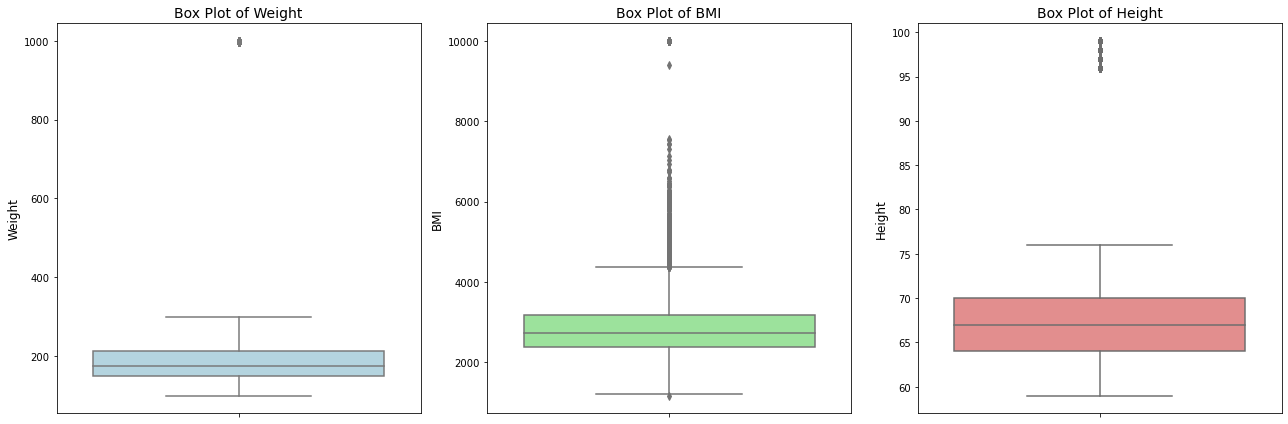

In [100]:
# Extract height column for visualization
height_data = df['height']
weight_data = df['weight']
bmi_data = df['bmi']

# Create a figure for the box plots including height, with improved appearance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot box plot for weight
sns.boxplot(ax=axes[0], y=weight_data, color='lightblue')
axes[0].set_title('Box Plot of Weight', fontsize=14)
axes[0].set_ylabel('Weight', fontsize=12)

# Plot box plot for BMI
sns.boxplot(ax=axes[1], y=bmi_data, color='lightgreen')
axes[1].set_title('Box Plot of BMI', fontsize=14)
axes[1].set_ylabel('BMI', fontsize=12)

# Plot box plot for height
sns.boxplot(ax=axes[2], y=height_data, color='lightcoral')
axes[2].set_title('Box Plot of Height', fontsize=14)
axes[2].set_ylabel('Height', fontsize=12)

# Improve layout and aesthetics
plt.tight_layout()
#plt.savefig('box_plots.png', format='png', dpi=300, bbox_inches='tight')
plt.show()



In [22]:
# IQR Method to count how many variables have been removed

#  Calculate IQR for BMI
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for non-outliers
non_outliers_mask = (df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)

# Count the number of original entries and non-outliers
original_count = len(df)
non_outliers_count = non_outliers_mask.sum()

# Calculate how many BMI outliers were clipped
outliers_clipped = original_count - non_outliers_count

print(f"Number of BMI outliers clipped: {outliers_clipped}")

# Now for weight
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for non-outliers
non_outliers_mask = (df['weight'] >= lower_bound) & (df['weight'] <= upper_bound)

# Count the number of original entries and non-outliers
original_count = len(df)
non_outliers_count = non_outliers_mask.sum()

# Calculate how many BMI outliers were clipped
outliers_clipped = original_count - non_outliers_count

print(f"Number of Weight outliers clipped: {outliers_clipped}")

# Now for height
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for non-outliers
non_outliers_mask = (df['height'] >= lower_bound) & (df['height'] <= upper_bound)

# Count the number of original entries and non-outliers
original_count = len(df)
non_outliers_count = non_outliers_mask.sum()

# Calculate how many BMI outliers were clipped
outliers_clipped = original_count - non_outliers_count

print(f"Number of Height outliers clipped: {outliers_clipped}")

Number of BMI outliers clipped: 1895
Number of Weight outliers clipped: 2991
Number of Height outliers clipped: 2295


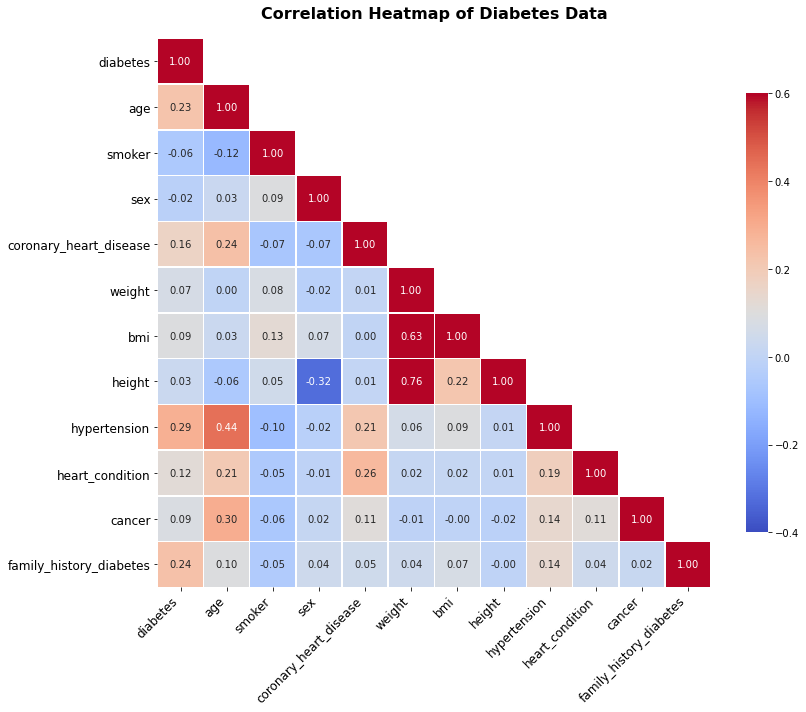

In [8]:
# Calculate the correlation matrix for numerical columns
corr_matrix = df.corr()

# Create a mask to show only one triangle of the heatmap
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a mask that only keeps the lower triangle and the diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plotting the correlation heatmap for all numerical columns including variances (diagonal values as 1.00)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, linewidths=0.5, vmin=-0.4, vmax=0.6, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Diabetes Data", fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig('heatmap_triangle.png', format='png', dpi=300, bbox_inches='tight')
plt.show()



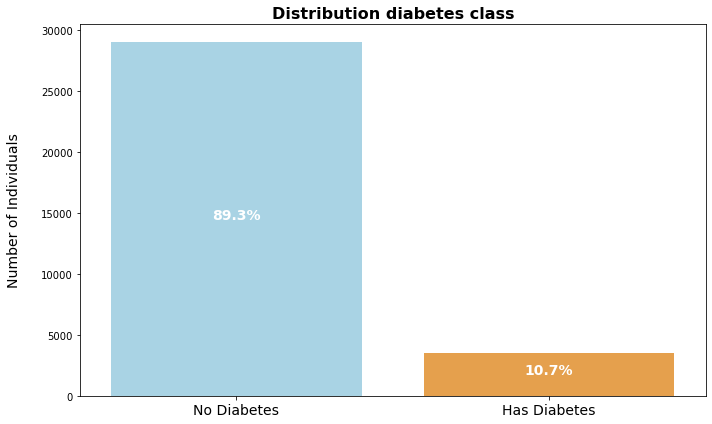

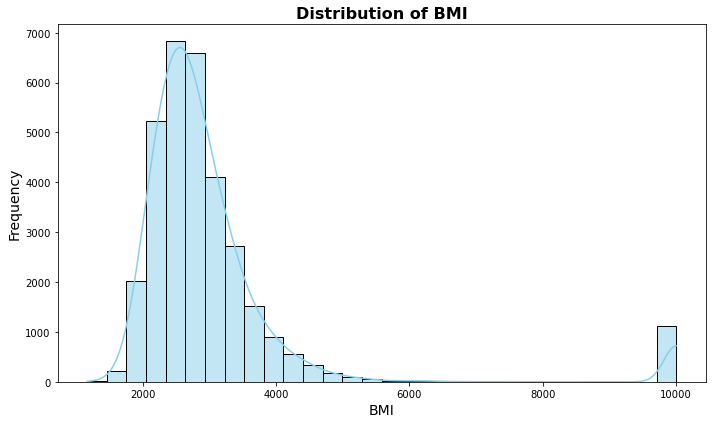

In [125]:
diabetes_class_counts = df['diabetes'].value_counts()
diabetes_class_percent = diabetes_class_counts / diabetes_class_counts.sum() * 100

# Create a bar plot to visualize the class distribution with bold labels for categories
plt.figure(figsize=(10, 6))
sns.barplot(x=['No Diabetes', 'Has Diabetes'], y=diabetes_class_counts.values, palette=['skyblue', 'darkorange'], alpha=0.8)

# Add percentages inside the bars for better clarity
for i, value in enumerate(diabetes_class_counts.values):
    plt.text(i, value / 2, f'{diabetes_class_percent[i]:.1f}%', ha='center', fontsize=14, weight='bold', color='white')

# Customize the grid for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.4)

# Set axis labels and title with enhanced formatting
plt.ylabel('Number of Individuals', fontsize=14, labelpad=20)
plt.title('Distribution diabetes class', fontsize=16, weight='bold')

# Set x-ticks with bold labels
plt.xticks([0, 1], ['No Diabetes', 'Has Diabetes'], fontsize=14)

# Improve layout and aesthetics
plt.tight_layout()

if True:
    plt.savefig('diabetes_class_distribution.png', format='png', dpi=300, bbox_inches='tight')
    
plt.show()


# Plot a histogram to visualize the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, color='skyblue', bins=30)

# Set plot labels and title
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of BMI', fontsize=16, weight='bold')

# Display the plot
plt.tight_layout()
plt.show()


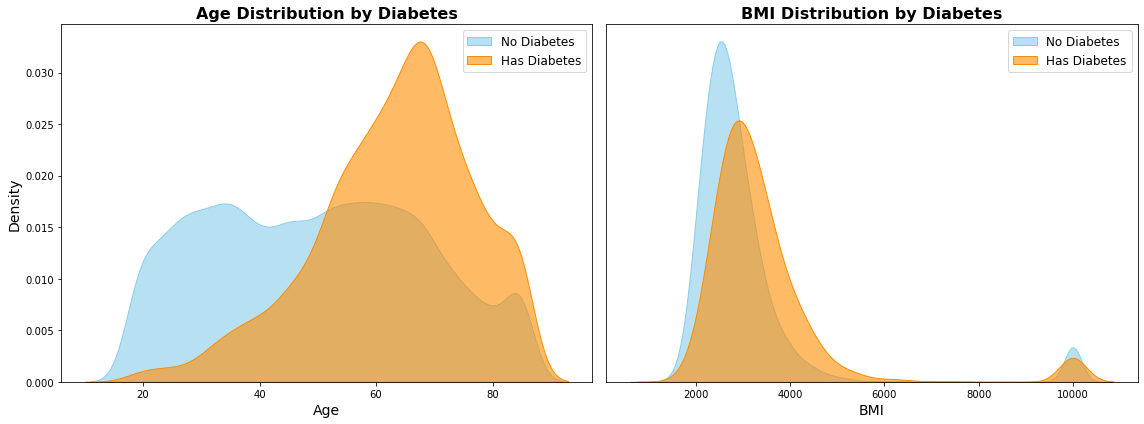

In [96]:
# Extract age and BMI values for individuals with and without diabetes
age_no_diabetes = df[df['diabetes'] == 0]['age']
age_with_diabetes = df[df['diabetes'] == 1]['age']
bmi_no_diabetes = df[df['diabetes'] == 0]['bmi']
bmi_with_diabetes = df[df['diabetes'] == 1]['bmi']

# Create a 1x2 subplot for density plots of age and BMI distributions by diabetes status
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the density for age distribution by diabetes status
sns.kdeplot(age_no_diabetes, shade=True, color='skyblue', label='No Diabetes', alpha=0.6, ax=axes[0])
sns.kdeplot(age_with_diabetes, shade=True, color='darkorange', label='Has Diabetes', alpha=0.6, ax=axes[0])
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Density', fontsize=14)
axes[0].set_title('Age Distribution by Diabetes', fontsize=16, weight='bold')
axes[0].legend(fontsize=12)

# Plot the density for BMI distribution by diabetes status
sns.kdeplot(bmi_no_diabetes, shade=True, color='skyblue', label='No Diabetes', alpha=0.6, ax=axes[1])
sns.kdeplot(bmi_with_diabetes, shade=True, color='darkorange', label='Has Diabetes', alpha=0.6, ax=axes[1])
axes[1].set_xlabel('BMI', fontsize=14)
axes[1].set_ylabel('', fontsize=14)
axes[1].set_title('BMI Distribution by Diabetes', fontsize=16, weight='bold')
axes[1].legend(fontsize=12)
axes[1].set_yticks([])

# Adjust layout for better spacing
plt.tight_layout()
#plt.savefig('density_plots.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


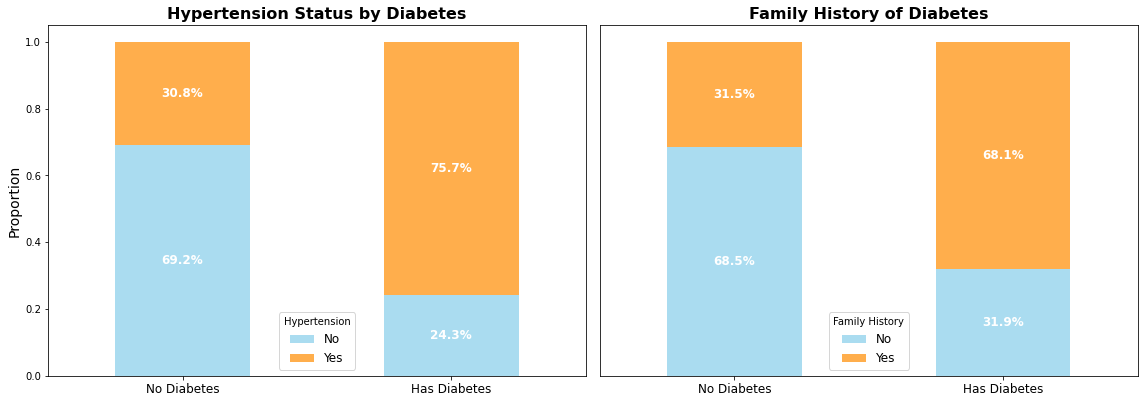

In [126]:
# Create a stacked bar chart for hypertension and family history of diabetes by diabetes status with percentages
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculate the proportions for hypertension by diabetes status
hypertension_counts = df.groupby(['diabetes', 'hypertension']).size().unstack(fill_value=0)
hypertension_props = hypertension_counts.div(hypertension_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart for hypertension proportions
hypertension_props.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'darkorange'], alpha=0.7)
axes[0].set_xlabel('', fontsize=14)
axes[0].set_ylabel('Proportion', fontsize=14)
axes[0].set_title('Hypertension Status by Diabetes', fontsize=16, weight='bold')
axes[0].legend(title='Hypertension', fontsize=12)

# Update legend labels from 0/1 to No/Yes
handles, labels = axes[0].get_legend_handles_labels()
new_labels = ['No', 'Yes']
axes[0].legend(handles, new_labels, title='Hypertension', fontsize=12)

# Update x-axis tick labels to 'No Diabetes' and 'Has Diabetes'
axes[0].set_xticklabels(['No Diabetes', 'Has Diabetes'], fontsize=12, rotation=0)


# Annotate percentages on the bars for hypertension
for i, bar in enumerate(axes[0].patches):
    if bar.get_height() > 0:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                     f'{height * 100:.1f}%', ha='center', va='center', fontsize=12, weight='bold', color='white')

# Calculate the proportions for family history of diabetes by diabetes status
family_history_counts = df.groupby(['diabetes', 'family_history_diabetes']).size().unstack(fill_value=0)
family_history_props = family_history_counts.div(family_history_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart for family history proportions
family_history_props.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'darkorange'], alpha=0.7)
axes[1].set_xlabel('', fontsize=14)
axes[1].set_ylabel('', fontsize=14)
axes[1].set_title('Family History of Diabetes', fontsize=16, weight='bold')
axes[1].legend(title='Family History', fontsize=12)
axes[1].set_yticks([])

# Update legend labels from 0/1 to No/Yes
handles, labels = axes[1].get_legend_handles_labels()
new_labels = ['No', 'Yes']
axes[1].legend(handles, new_labels, title='Family History', fontsize=12)

# Update x-axis tick labels to 'No Diabetes' and 'Has Diabetes'
axes[1].set_xticklabels(['No Diabetes', 'Has Diabetes'], fontsize=12, rotation=0)

# Annotate percentages on the bars for family history
for i, bar in enumerate(axes[1].patches):
    if bar.get_height() > 0:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,
                     f'{height * 100:.1f}%', ha='center', va='center', fontsize=12, weight='bold', color='white')

# Add a shared x-axis label for both subplots
#fig.text(0.5, 0.04, 'Diabetes Status (0=No, 1=Yes)', ha='center', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Uncomment following to save figure 
#plt.savefig('bar_plots.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [24]:
def prepareDiabetesData(df, 
                          make_id_numeric=False,
                          rescale_bmi=True, 
                          fix_smoker_values=True, 
                          sex_to_binary=True,
                          ohe_categorical=True, 
                          handle_outliers=True,
                          handle_imbalance=False,
                          age_binning=True, 
                          bmi_categorization=True):
    """
    Prepares the diabetes data based on action items.
    
    Parameters:
    df (pandas DataFrame): Input data
    make_id_numeric (bool): Whether to convert 'house_family_person_id' to numeric
    rescale_bmi (bool): Whether to fix BMI scale by dividing by 100
    fix_smoker_values (bool): Whether to fix inconsistent smoker values
    sex_to_binary (bool): Whether to fix sex column to binary
    ohe_categorical (bool): Whether to perform one-hot encoding on categorical variables
        note: gender = 1 is Female, gender = 0 is Male 
    handle_outliers (bool): Whether to handle outliers in 'weight', 'bmi' and height
    handle_imbalance (bool): Whether to handle diabetes class imbalance using SMOTE
    age_binning (bool): Whether to bin ages
    bmi_categorization (bool): Whether to categorize BMI into standard ranges
    
    Returns:
    pandas DataFrame: Cleaned and processed data
    """
    
    # Create a copy of the dataframe to ensure the original is untouched
    df_cleaned = df.copy()
    
    # 1. Convert 'house_family_person_id' to numeric
    if make_id_numeric:
        df_cleaned['house_family_person_id'] = pd.factorize(df_cleaned['house_family_person_id'])[0]

    # 2. Fix BMI scale (divide by 100)
    if rescale_bmi:
        df_cleaned['bmi'] = df_cleaned['bmi'] / 100

    # 3. Fix inconsistent smoker values
    if fix_smoker_values:
        # Remove rows where 'smoker' values are greater than 2
        df_cleaned = df_cleaned[df_cleaned['smoker'] <= 2]
        # Map 'smoker' from 1 (non-smoker) to 0, 2 (smoker) to 1
        df_cleaned['smoker'] = df_cleaned['smoker'].map({1: 0, 2: 1})
        
    if sex_to_binary:
        #df_cleaned.rename(columns={'sex': 'gender'}, inplace=True)
        df_cleaned['sex'] = df_cleaned['sex'].map({1: 0, 2: 1})

    # 4. Handle outliers for weight, BMI, and height using IQR (before SMOTE)
    if handle_outliers:
        def clip_outliers(col):
            """Clips outliers using the IQR method (1.5*IQR rule)."""
            Q1 = col.quantile(0.25)
            Q3 = col.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return col.clip(lower=lower_bound, upper=upper_bound)
        
        df_cleaned['weight'] = clip_outliers(df_cleaned['weight'])
        df_cleaned['bmi'] = clip_outliers(df_cleaned['bmi'])
        df_cleaned['height'] = clip_outliers(df_cleaned['height'])
            
    # 5. Handle Diabetes Class Imbalance using SMOTE (before any categorical transformations)
    if handle_imbalance:
        smote = SMOTE(random_state=42)
        X = df_cleaned.drop('diabetes', axis=1)
        y = df_cleaned['diabetes']
        X_res, y_res = smote.fit_resample(X, y)
        df_cleaned = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['diabetes'])], axis=1)

    # 6. Bin Ages into categories (after SMOTE)
    if age_binning:
        df_cleaned['age_bin'] = pd.cut(df_cleaned['age'], bins=[18, 30, 50, 85], labels=['Under 30', '30-50', '50+'])
        if ohe_categorical:
            df_age_ohe = pd.get_dummies(df_cleaned['age_bin'], prefix='age')
            df_cleaned = pd.concat([df_cleaned, df_age_ohe], axis=1)
            df_cleaned.drop('age_bin', axis=1, inplace=True)

    # 7. Categorize BMI into standard medical categories (after SMOTE)
    if bmi_categorization:
        df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
        if ohe_categorical:
            df_bmi_ohe = pd.get_dummies(df_cleaned['bmi_category'], prefix='bmi')
            df_cleaned = pd.concat([df_cleaned, df_bmi_ohe], axis=1)
            df_cleaned.drop('bmi_category', axis=1, inplace=True)
    
    # 8. One-Hot Encode categorical variables (smoker, sex, BMI, and age bins)
    if ohe_categorical:
        # Apply OHE to smoker and sex columns
        ohe = OneHotEncoder(drop='first', sparse=False)
        # One-hot encode 'smoker' and 'sex'
        df_ohe = pd.DataFrame(ohe.fit_transform(df_cleaned[['smoker', 'sex']]), 
                              columns=ohe.get_feature_names(['smoker', 'sex']))  # Use get_feature_names for column names

        # Convert one-hot encoded columns to integers (0 or 1)
        df_ohe = df_ohe.astype(int)

        # Concatenate the new one-hot encoded columns back to the original dataframe
        df_cleaned = pd.concat([df_cleaned, df_ohe], axis=1)

        # Drop the original 'smoker' and 'sex' columns
        df_cleaned.drop(['smoker', 'sex'], axis=1, inplace=True)
        
        # Rename for clarity
        df_cleaned.rename(columns={'smoker_2': 'smoker', 'sex': 'gender'}, inplace=True)
    
    return df_cleaned  # Return the cleaned dataframe

In [25]:
df_cleaned = prepareDiabetesData(df, 
                                 make_id_numeric=True,
                          rescale_bmi=True, 
                          fix_smoker_values=True,
                          sex_to_binary=True,
                          ohe_categorical=False, 
                          handle_outliers=True,
                          handle_imbalance=True,
                          age_binning=False, 
                          bmi_categorization=False)

In [18]:
display(df_cleaned)
display(df_cleaned.shape)
#df_cleaned.to_csv('diabetes_cleaned.csv', index=False)

,house_family_person_id,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,diabetes
0,0,24,1,1,0,125.000000,20.190000,66,0,0,0,0,0
1,1,76,1,0,0,190.000000,27.270000,70,1,0,0,0,0
2,2,36,1,1,0,225.000000,38.620000,64,0,0,0,1,0
3,3,35,0,1,0,240.000000,39.950000,65,0,0,0,1,0
4,4,20,1,1,0,103.000000,18.830000,62,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57835,21053,74,0,0,0,205.427809,34.637005,64,0,0,0,0,1
57836,32307,80,0,0,0,186.437896,28.781062,67,1,0,0,0,1
57837,28157,67,0,0,0,153.862542,23.453069,67,0,0,0,0,1
57838,8720,50,0,0,0,196.037539,31.505809,66,1,0,0,1,1


(57840, 13)